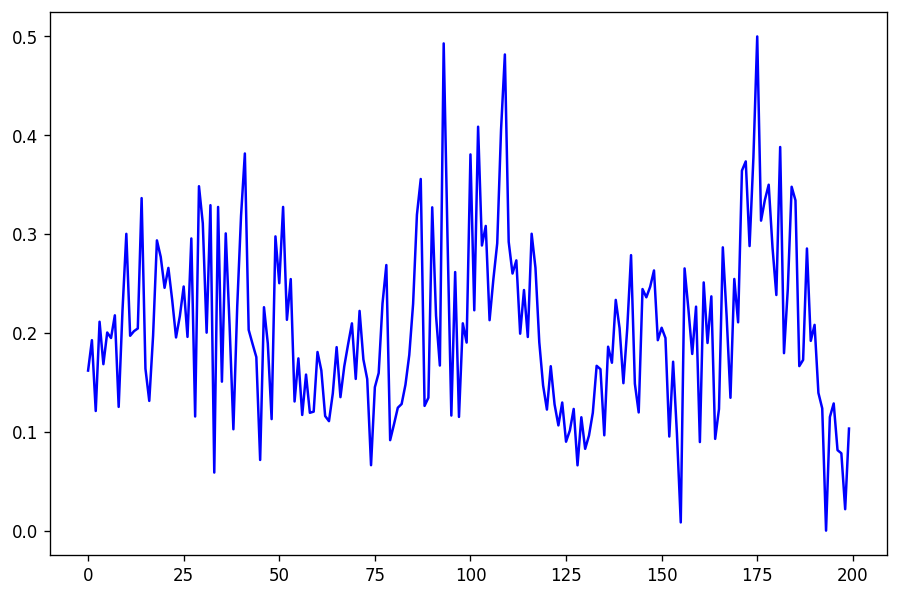

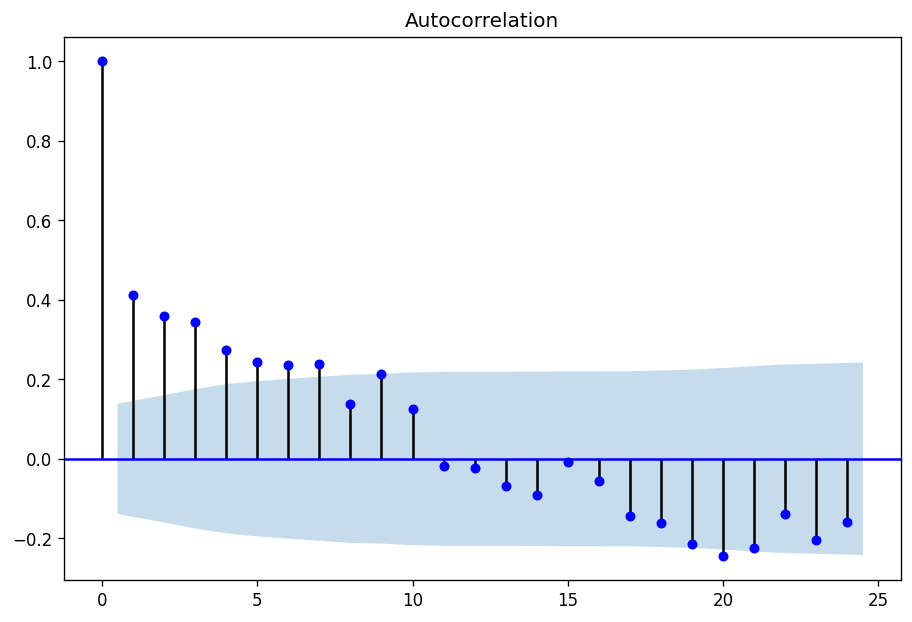

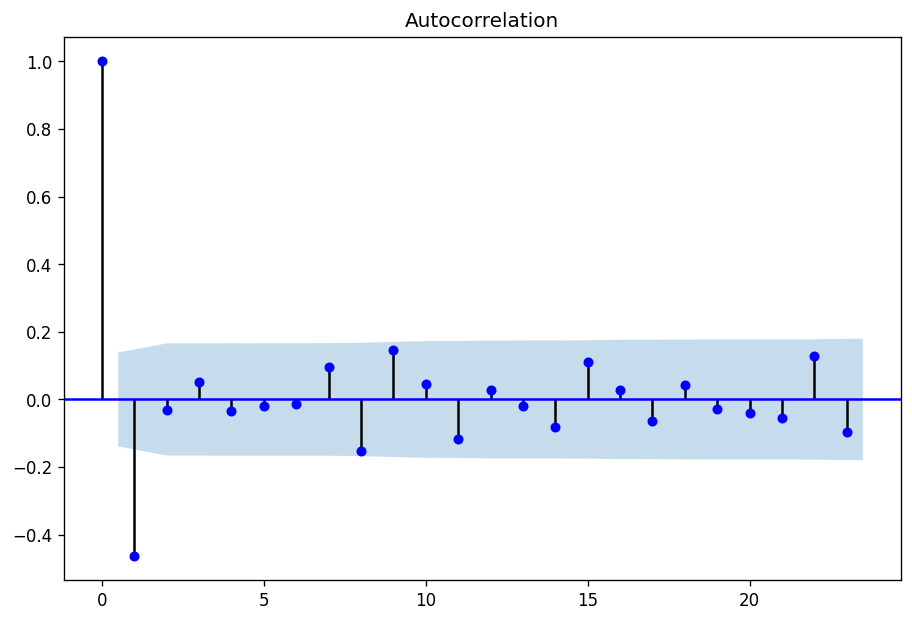

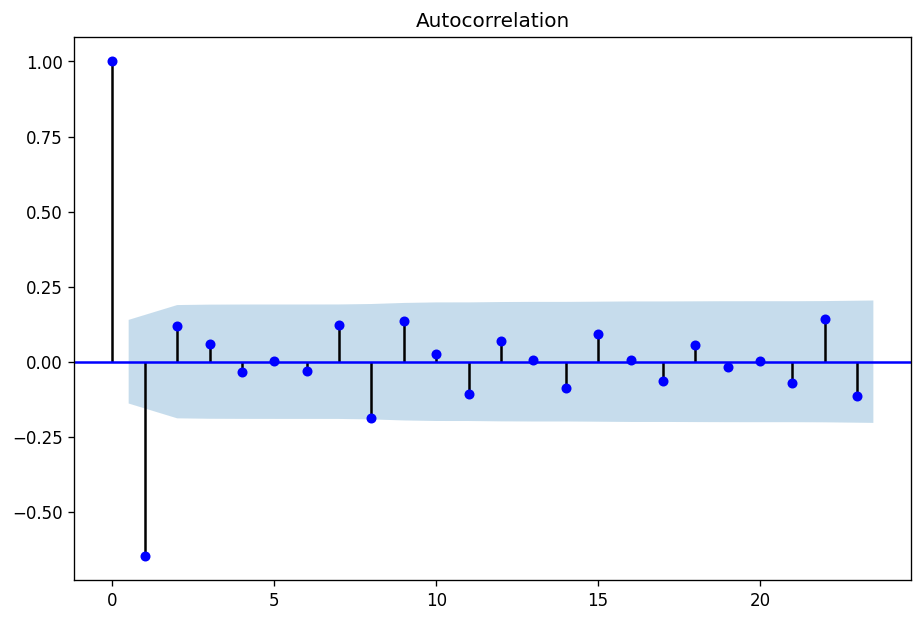

In [51]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})

# Import data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

n = 200
limit_low = 0
limit_high = 0.5
my_data = np.random.normal(0, 0.5, n) \
          + np.abs(np.random.normal(0, 2, n) \
                   * np.sin(np.linspace(0, 3*np.pi, n)) ) \
          + np.sin(np.linspace(0, 5*np.pi, n))**2 \
          + np.sin(np.linspace(1, 6*np.pi, n))**2

scaling = (limit_high - limit_low) / (max(my_data) - min(my_data))
my_data = my_data * scaling
my_data = my_data + (limit_low - min(my_data))

df = pd.DataFrame(my_data)  

### plot(df)

#fig, ax1 = plt.subplots(figsize=(6,3))
fig = plt.plot(df,  color='blue')
ax2 = ax1.twiny()

# Original Series
#fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df , color='blue')
axes[0, 0].set_title('Original Series')
plot_acf(df,  color='blue') #ax=axes[0, 1],



# 1st Differencing
axes[1, 0].plot(df.diff(), color='blue' ); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), color='blue' ) # , ax=axes[1, 1]

# 2nd Differencing
axes[2, 0].plot(df.diff().diff(), color='blue' ) 
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), color='blue' ) # , ax=axes[2, 1]

plt.show()
